# Setup

## Install dependencies

In [1]:
!pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
!pip install networkx==2.6.2

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |███████████████████████         | 834.1 MB 1.5 MB/s eta 0:03:35tcmalloc: large alloc 1147494400 bytes == 0x55e181bfe000 @  0x7f77af06c615 0x55e1481583bc 0x55e14823918a 0x55e14815b1cd 0x55e14824db3d 0x55e1481cf458 0x55e1481ca02f 0x55e14815caba 0x55e1481cf2c0 0x55e1481ca02f 0x55e14815caba 0x55e1481cbcd4 0x55e14824e986 0x55e1481cb350 0x55e14824e986 0x55e1481cb350 0x55e14824e986 0x55e1481cb350 0x55e14815cf19 0x55e1481a0a79 0x55e14815bb32 0x55e1481cf1dd 0x55e1481ca02f 0x55e14815caba 0x55e1481cbcd4 0x55e1481ca02f 0x55e14815caba 0x55e1481caeae 0x55e14815c9da 0x55e1481cb108 0x55e1481ca02f
     |█████████████████████████████▏  | 1055.7 MB 1.3 MB/s eta 0:01:20tcmalloc: large alloc 1434370048 bytes == 0x55e1c6254000 @  0x7f77af06c615 0x55e1481583bc 0x55e14823918a 0x55e14815b1cd 0x55e14824db3d 0x55e1481cf458 0x55e1481ca02f 0x55e14815caba 0x55e1481cf2c0 0x55e1481ca02f 0x55e14815caba 0x55e1481cbcd4 0x55e14824e986 0x55e1481cb3

## Clone repo

In [2]:
!git clone https://github.com/fyviezhao/2D-Human-Parsing

Cloning into '2D-Human-Parsing'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 79 (delta 23), reused 65 (delta 14), pack-reused 0
Unpacking objects: 100% (79/79), done.


## Download model

In [6]:
cd 2D-Human-Parsing/pretrained

[Errno 2] No such file or directory: '2D-Human-Parsing/pretrained'
/content/2D-Human-Parsing


In [4]:
!gdown https://drive.google.com/uc?id=1cTYhbKbtrPfREVI_EkredmIq5WaT5GY6

Downloading...
From: https://drive.google.com/uc?id=1cTYhbKbtrPfREVI_EkredmIq5WaT5GY6
To: /content/2D-Human-Parsing/pretrained/deeplabv3plus-xception-vocNov14_20-51-38_epoch-89.pth
100% 167M/167M [00:01<00:00, 139MB/s]


In [5]:
cd ..

/content/2D-Human-Parsing


# Create mask

Add the images to demo_imgs folder and edit the img_list.txt with the location of the images.

In [7]:
cd inference

/content/2D-Human-Parsing/inference


## Edit img_list.txt

/content/2D-Human-Parsing/demo_imgs/suit.jpg
/content/2D-Human-Parsing/demo_imgs/skirt.jpg
/content/2D-Human-Parsing/demo_imgs/coat.jpg
/content/2D-Human-Parsing/demo_imgs/multiperson.jpg


## Edit demo.sh


CUDA_VISIBLE_DEVICES=0 \
python inference_acc.py \
--loadmodel '../pretrained/deeplabv3plus-xception-vocNov14_20-51-38_epoch-89.pth' \
--img_list '../demo_imgs/img_list.txt' \
--output_dir '../parsing_result'

In [10]:
!bash demo.sh

Constructing DeepLabv3+ model...
Number of classes: 20
Output stride: 16
Number of Input Channels: 3
missing keys in state_dict: "{'xception_features.block15.rep.5.pointwise_bn.num_batches_tracked', 'xception_features.block15.rep.5.depthwise_bn.num_batches_tracked', 'xception_features.block13.rep.3.pointwise_bn.num_batches_tracked', 'aspp3.atrous_convolution.pointwise_bn.num_batches_tracked', 'xception_features.block17.rep.1.pointwise_bn.num_batches_tracked', 'xception_features.block20.rep.5.depthwise_bn.num_batches_tracked', 'xception_features.block1.skipbn.num_batches_tracked', 'xception_features.block15.rep.3.pointwise_bn.num_batches_tracked', 'xception_features.block13.rep.5.depthwise_bn.num_batches_tracked', 'xception_features.block4.rep.3.pointwise_bn.num_batches_tracked', 'xception_features.block16.rep.3.depthwise_bn.num_batches_tracked', 'xception_features.block7.rep.1.depthwise_bn.num_batches_tracked', 'xception_features.block11.rep.5.depthwise_bn.num_batches_tracked', 'xcepti

The result can be obtained from the ./parsing_result/train_parsing/demo_imgs/ directory.

# Result

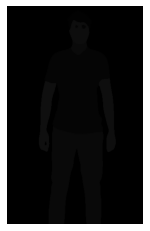

In [12]:
import cv2
import matplotlib.pyplot as plt

img_path = '/content/2D-Human-Parsing/parsing_result/train_parsing/demo_imgs/d1_label.png'

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')
plt.show()